В качестве анализируемого набора данных рассмотрим набор данных Data of rotary machine defects Для анализа исследованы файлы data_5_1.csv, data_5_2.csv, data_5_3.csv, data_5_4.csv.

data_5_1 — нет дефектов,
data_4_2 — несоосность в муфте,
data_4_3 — наличие дисбаланса,
data_4_4 — втулка с дефектами.

В первую очередь импортируем необходимые библиотеки, создадим необходимые переменные

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

fluctuations = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing',
                'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing',
                'Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth',
                'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth']

temperatures = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']

attributes = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing',
              'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing',
              'Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth',
              'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth',
              'Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']

Получим информацию и статистику о наборах данных на примере сета без дефектов

In [2]:

def main():
    df51 = pd.read_csv('data_5_1.csv')
    print(df51.info())
    print(df51.describe())


if __name__ == '__main__':
    main()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

Исследуем распределение данных в каждом из файлов с помощью гистограмм и ящиков с усами. Ввиду того, что параметры колебаний и температур имеют различные размерности и диапазоны значений, расположим их на отдельных графиках.

Код функции и пример визуализации гистограмм и ящиков с усами для параметров из конкретного набора данных

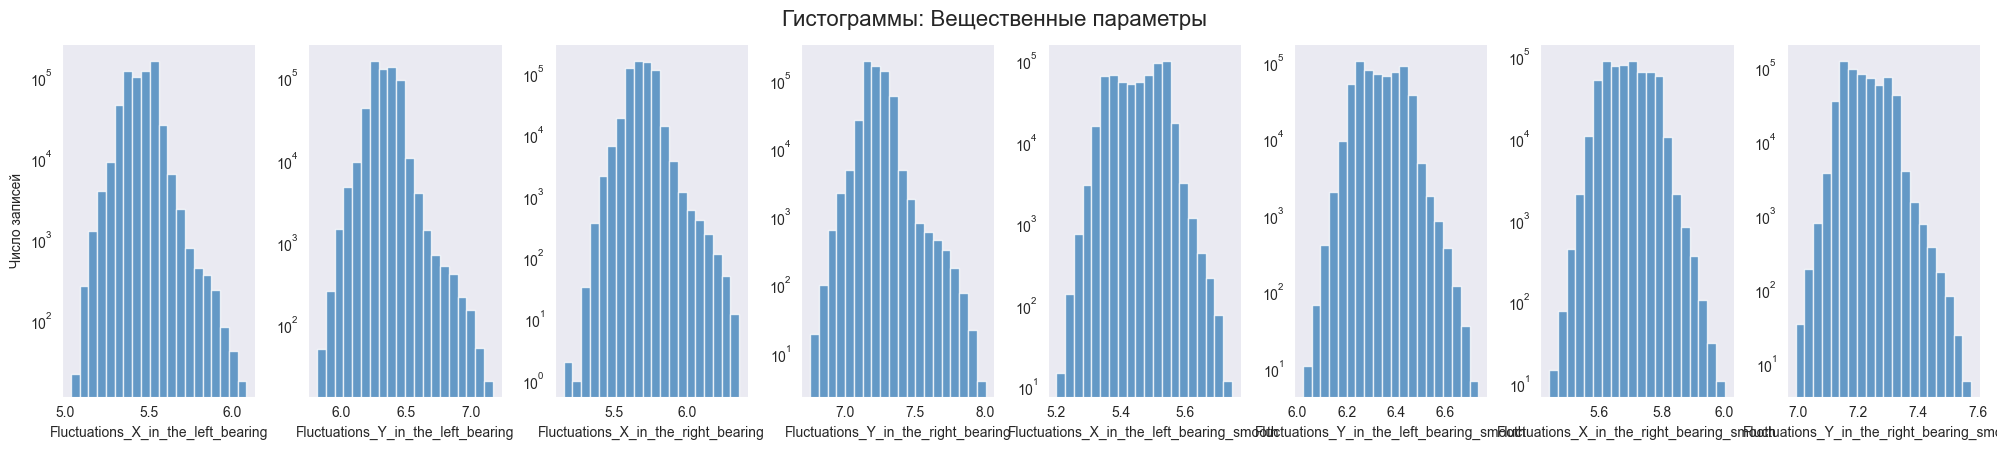

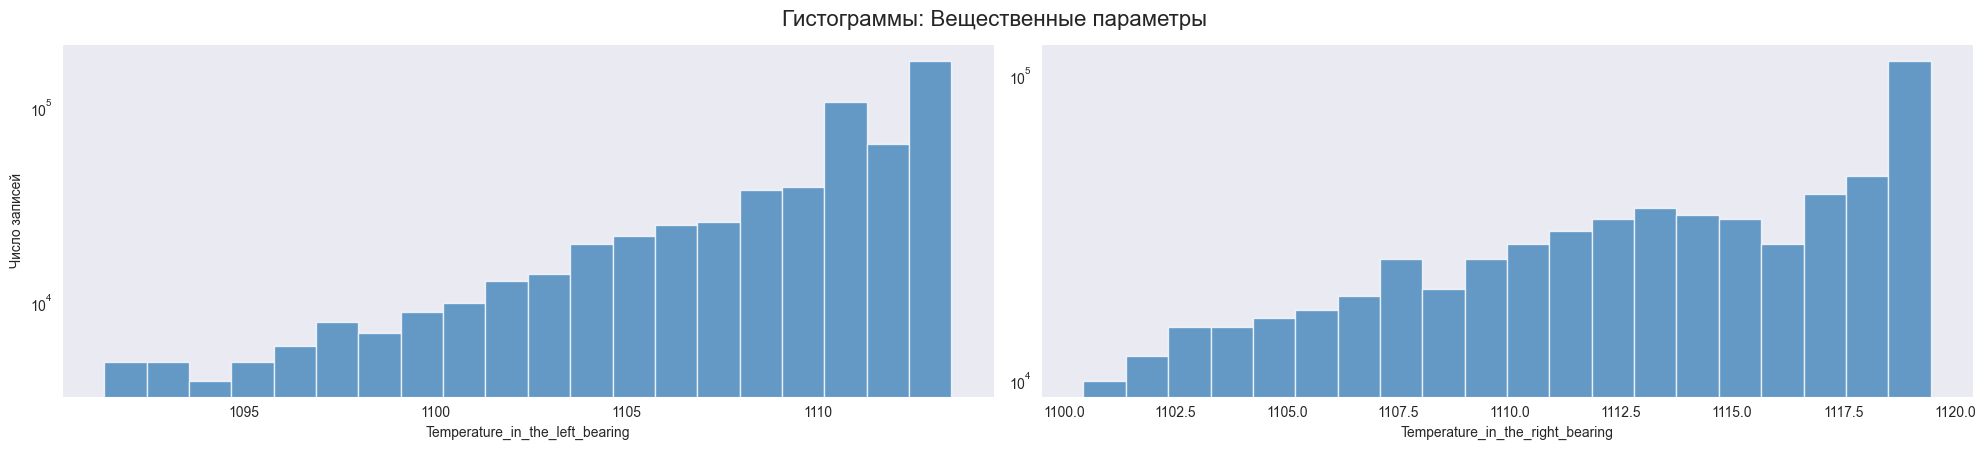

In [4]:
def hist_for_attribute_set(df, labels, ax, bin_num=25, y_scale='linear'):
    for i, col in enumerate(labels):
        ax[i].set_yscale(y_scale)
        ax[i].tick_params(labelsize=10)
        ax[i].set_xlabel(col)

        # уберем лишние границы графика
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].grid()

        ax[i].hist(df[col], bin_num, density=False, color='#377eb8', alpha=.75)  # синий

    # если графиков меньше чем есть в сетке, убираем лишние оси
    len_labels = len(labels)
    len_ax = len(ax)
    if len_labels < len_ax:
        for ax in ax[len_labels: len_labels + (len_ax - len_labels)]:
            ax.axis('off')


def fun_paint_hist(df):
    fig, ax = plt.subplots(nrows=1, ncols=len(fluctuations), figsize=(20, 5))

    hist_for_attribute_set(df, fluctuations, ax, bin_num=20, y_scale='log')

    ax[0].set_ylabel('Число записей')
    plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
    fig.tight_layout(rect=[0, .03, 1, .95])
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=len(temperatures), figsize=(20, 5))

    hist_for_attribute_set(df, temperatures, ax, bin_num=20, y_scale='log')

    ax[0].set_ylabel('Число записей')
    plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
    fig.tight_layout(rect=[0, .03, 1, .95])
    plt.show()


def main():
    df51 = pd.read_csv('data_5_1.csv')
    fun_paint_hist(df51)


if __name__ == '__main__':
    main()

На основании представленных выше графиков можно сделать вывод, что значения показаний колебаний во всех вариантах эксперимента распределены достаточно близко к нормальному закону, тогда как показания температуры в большинстве случаев возрастает. Однако на основании обособленных графиков сложно судить о влиянии отдельных дефектов на показания, поэтому ниже приведены гистограммы, показывающие совпадения показаний (бордовый цвет), показания эксперимента без дефектов(синий) и при влиянии того или иного дефекта (бледно красный).

Код функции и пример визуализации двух гистограмм для параметров из различных наборов данных

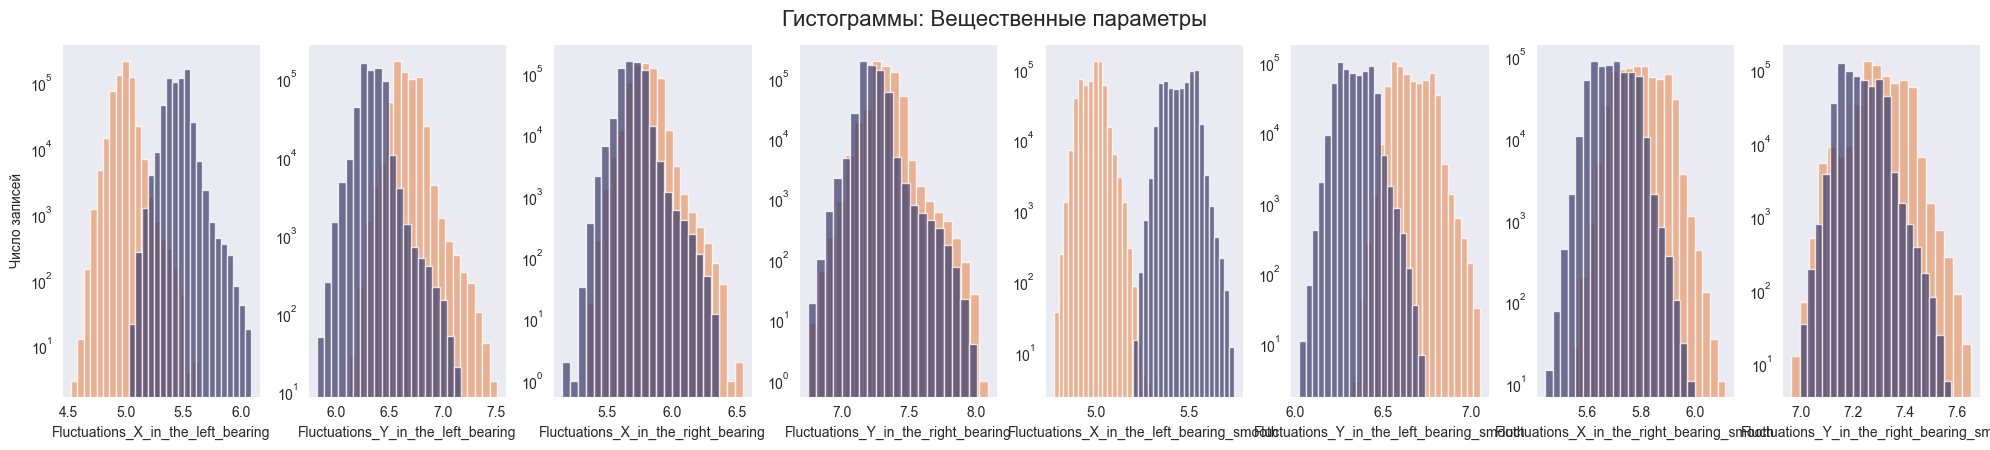

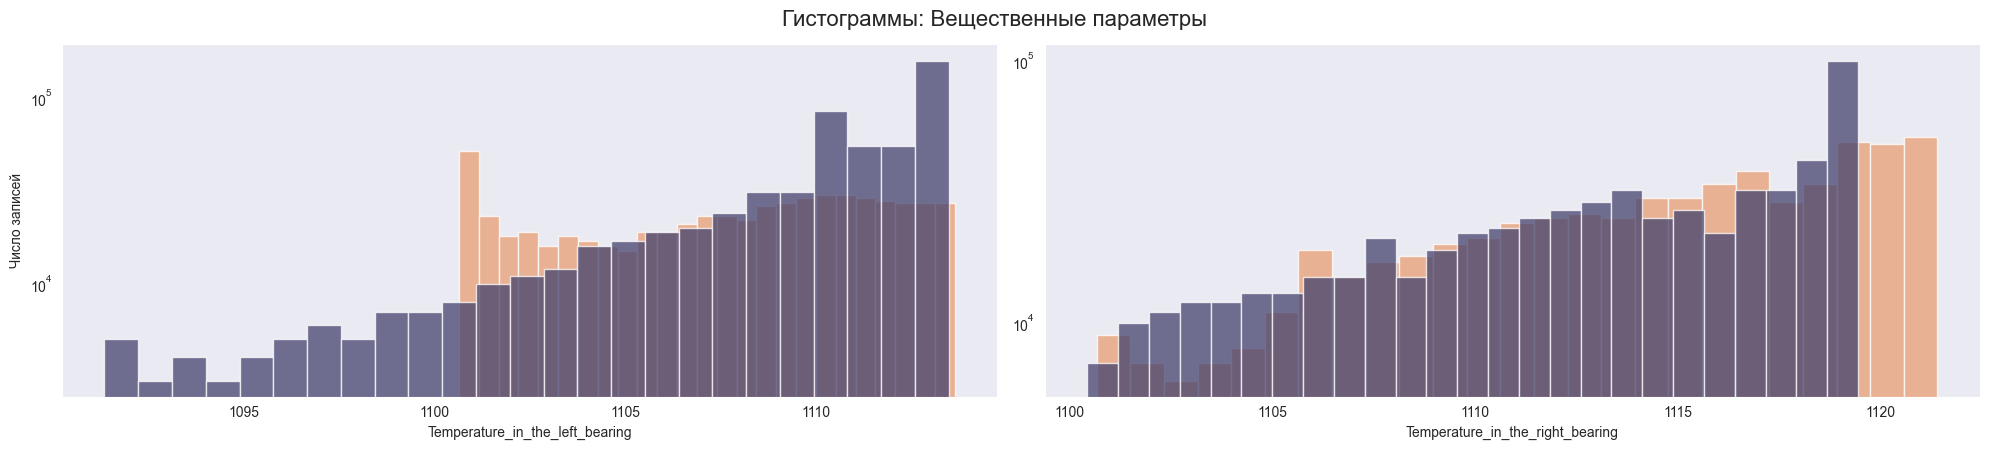

In [5]:
def hist_for_attribute_set2(df_1, df_2, labels, ax, bin_num=25, y_scale='linear'):
    for i, col in enumerate(labels):
        ax[i].set_yscale(y_scale)
        ax[i].tick_params(labelsize=10)
        ax[i].set_xlabel(col)

        # уберем лишние границы графика
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].grid()

        ax[i].hist(df_1[col], bin_num, density=False, color='#e99e75', alpha=.75)
        ax[i].hist(df_2[col], bin_num, density=False, color='#44426e', alpha=.75)  # синий

    # если графиков меньше чем есть в сетке, убираем лишние оси
    len_labels = len(labels)
    len_ax = len(ax)
    if len_labels < len_ax:
        for ax in ax[len_labels: len_labels + (len_ax - len_labels)]:
            ax.axis('off')


def fun_paint_hist2(df_1, df_2):
    fig, ax = plt.subplots(nrows=1, ncols=len(fluctuations), figsize=(20, 5))

    hist_for_attribute_set2(df_1, df_2, fluctuations, ax, bin_num=20, y_scale='log')

    ax[0].set_ylabel('Число записей')
    plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
    fig.tight_layout(rect=[0, .03, 1, .95])
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=len(temperatures), figsize=(20, 5))

    hist_for_attribute_set2(df_1, df_2, temperatures, ax, y_scale='log')

    ax[0].set_ylabel('Число записей')
    plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
    fig.tight_layout(rect=[0, .03, 1, .95])
    plt.show()


def main():
    df51 = pd.read_csv('data_5_1.csv')
    df42 = pd.read_csv('data_4_2.csv')
    fun_paint_hist2(df42, df51)


if __name__ == '__main__':
    main()

Однако подобное распределение по частоте встречаемости записей не даёт информации о зависимости значений и времени, поэтому изобразим их в порядке появления среди записей для первых 8 атрибутов с целью определения переходного периода системы, а также сравнение температур на протяжении всего времени измерений для стандартного набора данных и данных с дефектом.

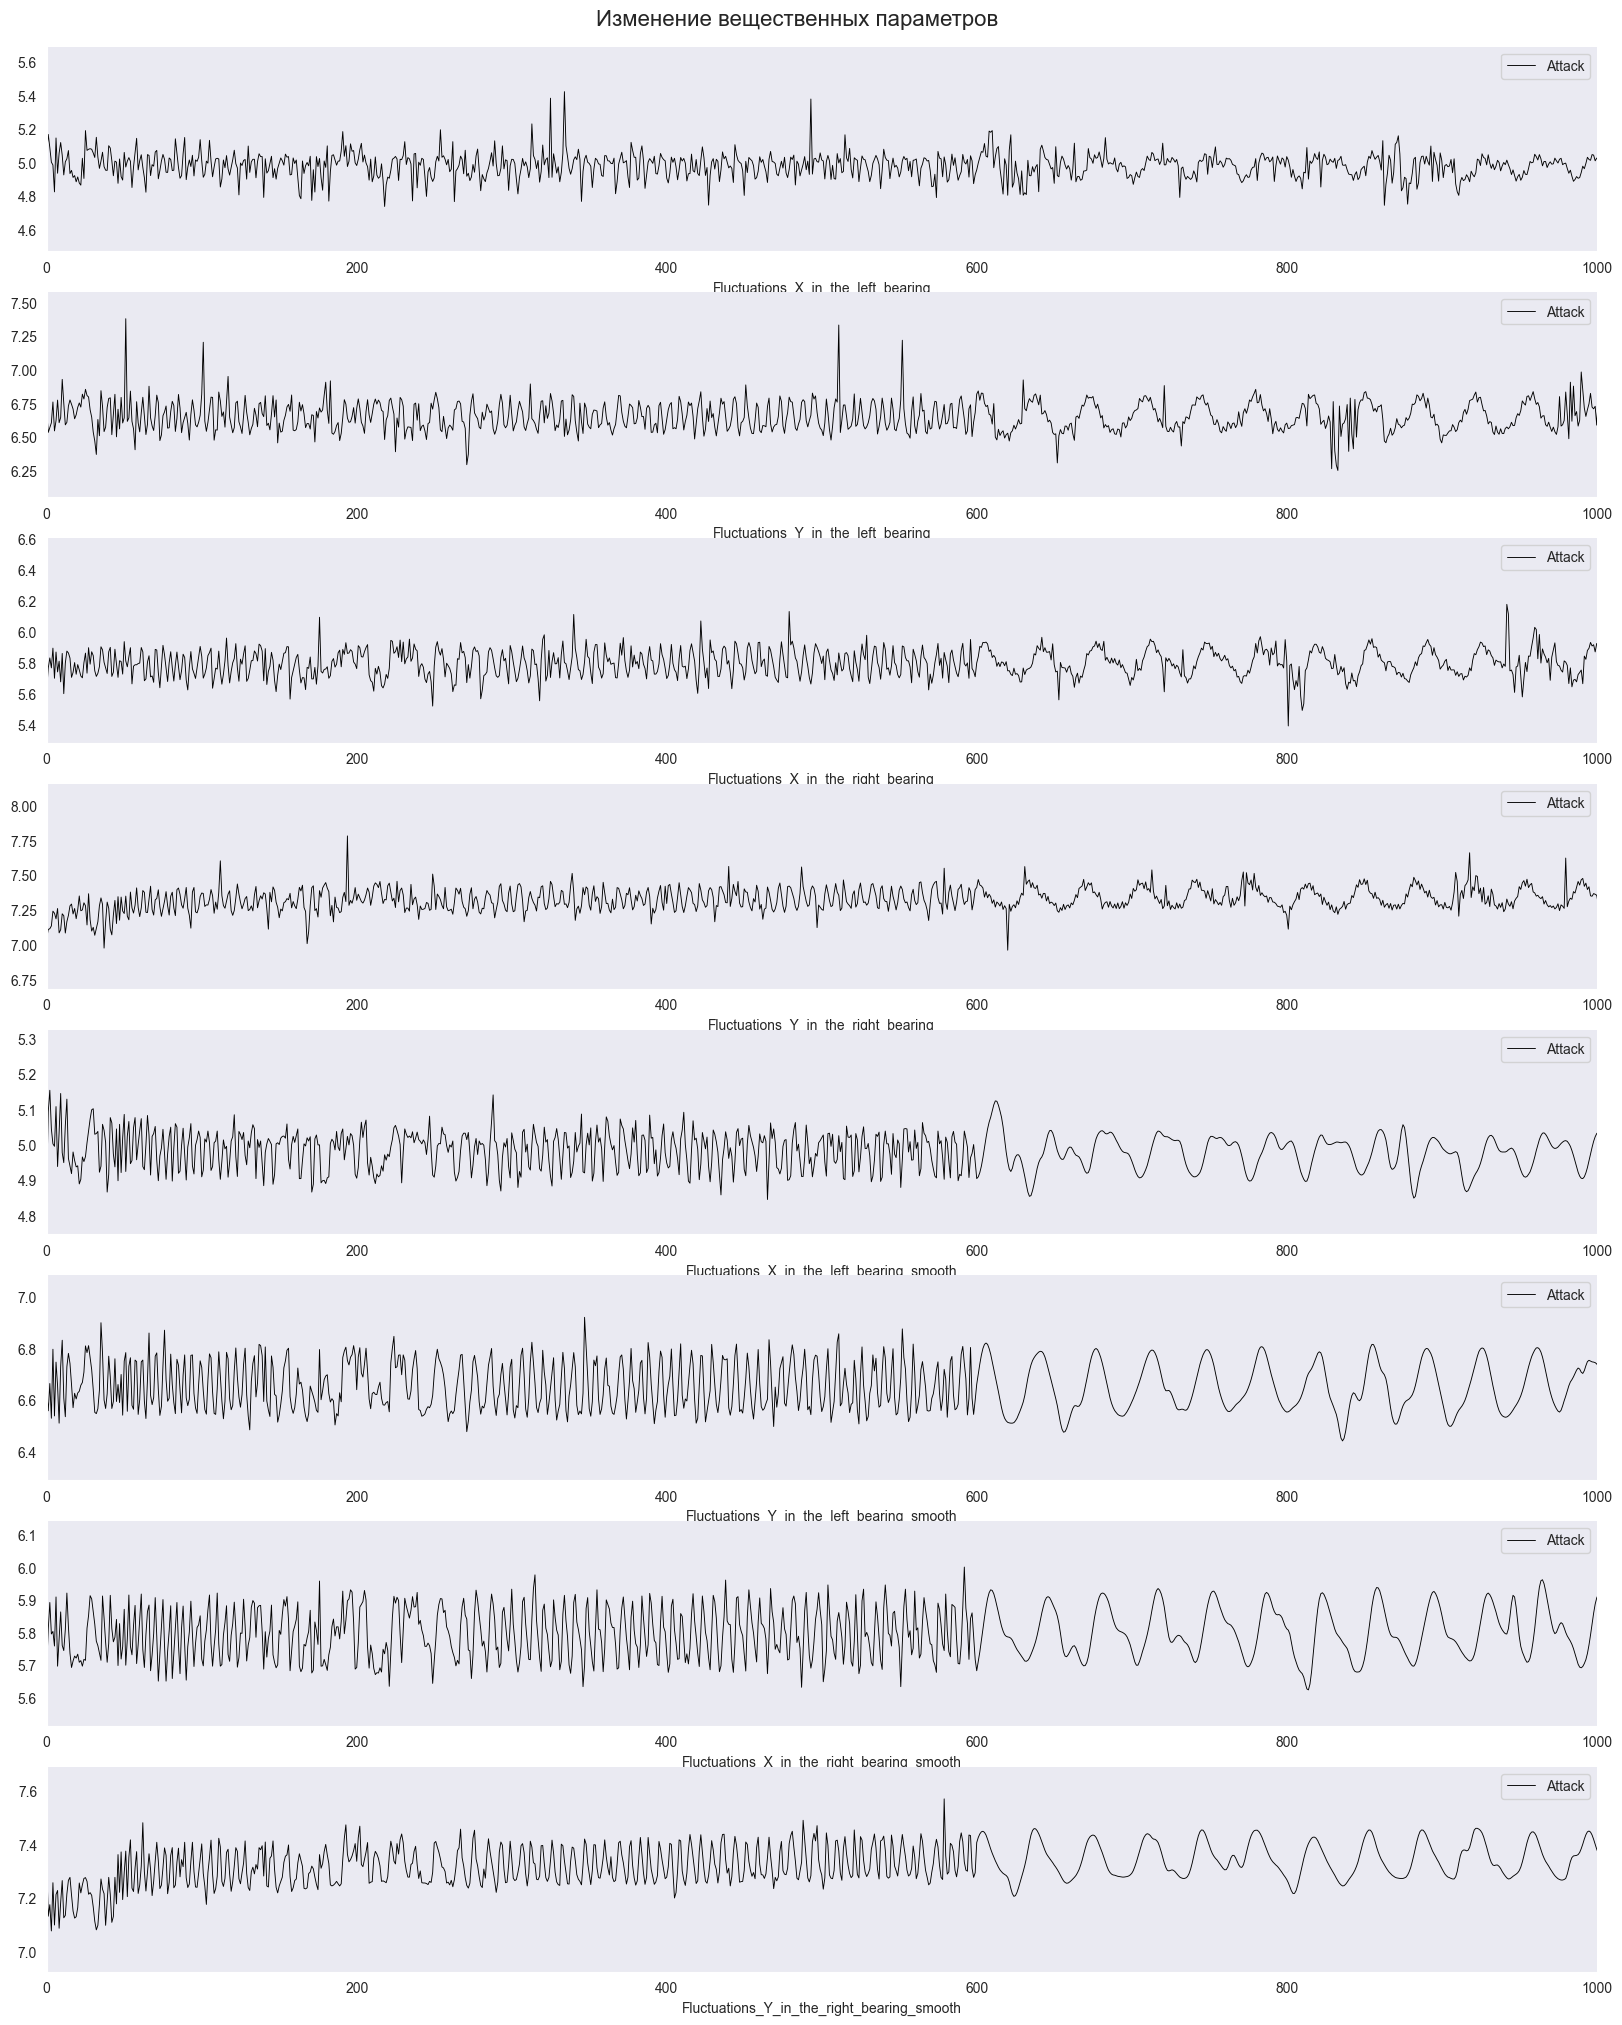

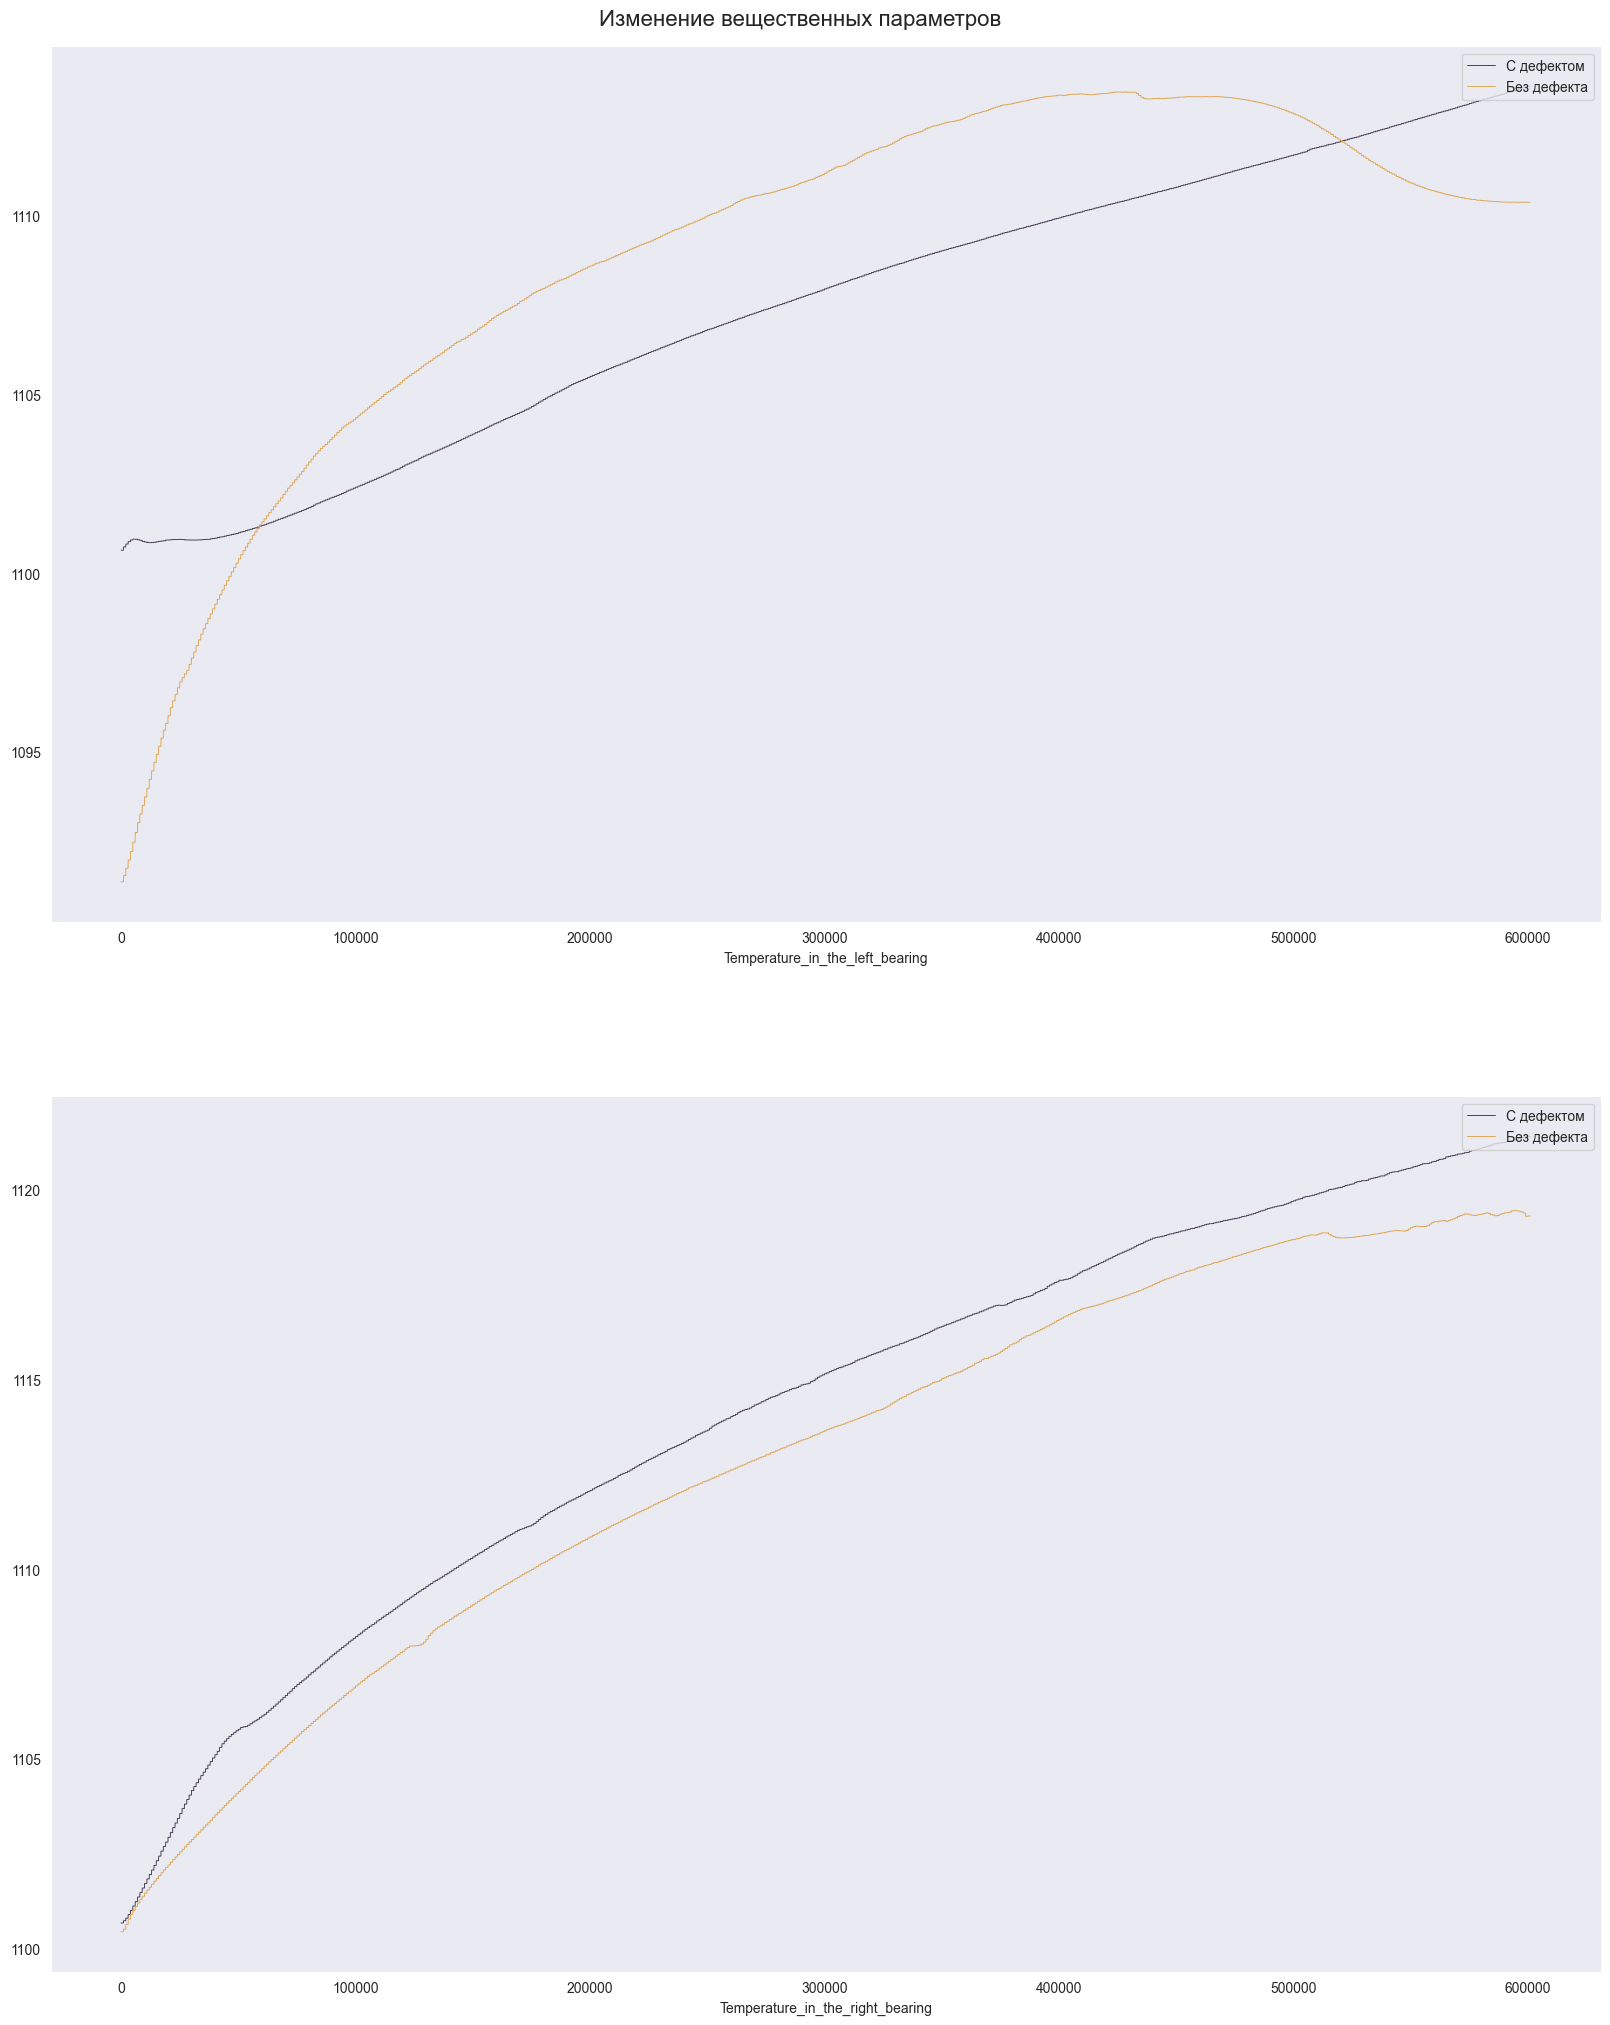

In [6]:
def lineplot_for_atribute_set(df, labels, ax):
    for i, col in enumerate(labels):
        ax[i].set_xlabel(col)
        ax[i].plot(df[col], color='black', linewidth=.65, label='Attack')

        # уберем лишние границы графика
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].legend(loc='upper right')
        ax[i].grid()
        ax[i].set_xlim(0, 1000)


def lineplot_for_atribute_set2(df_1, df_2, labels, ax):
    for i, col in enumerate(labels):
        ax[i].set_xlabel(col)
        ax[i].plot(df_1[col], color='#42354c', linewidth=.65, label='С дефектом')
        ax[i].plot(df_2[col], color='#dea450', linewidth=.65, label='Без дефекта')

        # уберем лишние границы графика
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].legend(loc='upper right')
        ax[i].grid()


def fun_paint_lin(df_1, df_2):
    fig, ax = plt.subplots(nrows=len(fluctuations), ncols=1, figsize=(20, 25))

    lineplot_for_atribute_set(df_1, fluctuations, ax)
    fig.suptitle('Изменение вещественных параметров', fontsize=16, y=.895)
    plt.show()

    fig, ax = plt.subplots(nrows=len(temperatures), ncols=1, figsize=(20, 25))

    lineplot_for_atribute_set2(df_1, df_2, temperatures, ax)
    fig.suptitle('Изменение вещественных параметров', fontsize=16, y=.895)
    plt.show()


def main():
    df51 = pd.read_csv('data_5_1.csv')
    df42 = pd.read_csv('data_4_2.csv')
    fun_paint_lin(df42, df51)


if __name__ == '__main__':
    main()

Код функции и пример визуализации матрицы корреляции для параметров конкретного набора данных

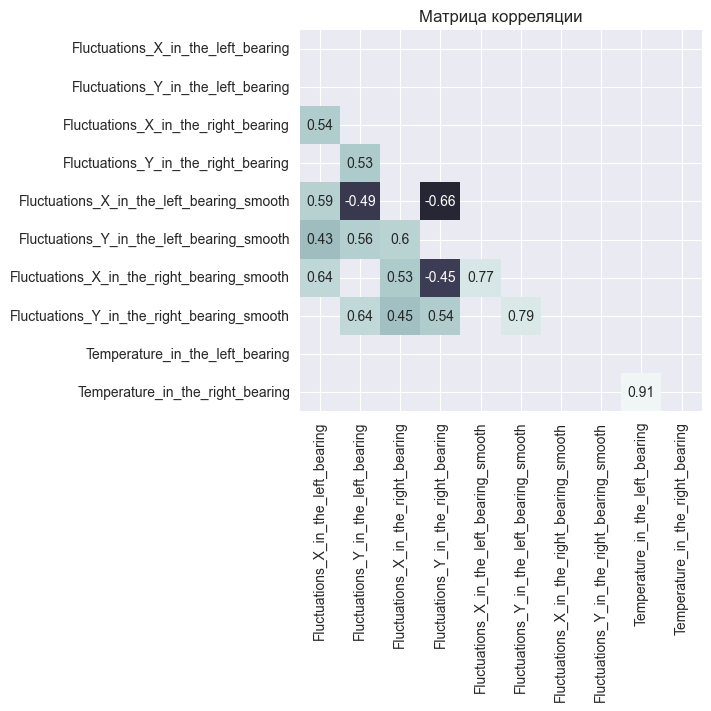

In [7]:
def heatmap(df, ax, title):
    corr = df.corr()

    # пропустим пары со слабой корреляцией, попробуем поэкспериментировать с этой настройкой
    df_corr = corr[(corr >= .4) | (corr <= -.4)]

    mask = np.triu(np.ones_like(corr))
    sns.heatmap(
        df_corr,
        cbar=False,
        mask=mask,
        ax=ax,
        annot=True,
        cmap='bone',
        vmin=-1,
        vmax=1,
    )

    ax.title.set_text(title)
    ax.tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
    )


def fun_paint_heatmap(df):
    fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
    heatmap(df[attributes], ax, 'Матрица корреляции')
    plt.show()


def main():
    df51 = pd.read_csv('data_5_1.csv')
    fun_paint_heatmap(df51)


if __name__ == '__main__':
    main()

Наконец, обратим внимание на код функции и пример применения преобразования PCA к конкретному набору данных

In [ ]:
def fun_pca(df):
    x = df[attributes].values

    # нормализуем значения
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=3)
    pca.fit_transform(x)
    print(f'Explained variance: {pca.explained_variance_ratio_}\tSum: {pca.explained_variance_ratio_.sum()}')


def main():
    df51 = pd.read_csv('data_5_1.csv')
    fun_pca(df51)


if __name__ == '__main__':
    main()